<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [1]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn  as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
df_std = df.iloc[6500000:,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
6500000,2.0,11330521.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,202001,1,40000000.0,1,82000.0,3831791.31,PEDRAZA,75,5.155400e+05
6500001,2.0,12562229.29,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,B,M,...,3,201904,1,40000000.0,4,0.0,3831791.31,PEDRAZA,74,3.327700e+05
6500002,2.0,11555331.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,201909,1,40000000.0,9,223000.0,3831791.31,PEDRAZA,74,5.994400e+05
6500003,2.0,9371320.00,3622610.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,B,M,...,12,202004,1,19500000.0,4,5948000.0,0.00,PEDRAZA,42,4.600000e+03
6500004,2.0,6519869.00,2941320.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,C,M,...,10,201911,0,0.0,11,27617000.0,0.00,PEDRAZA,41,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.00,PUERRES,47,7.431714e+05
9527189,3.0,26913722.00,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.00,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.00,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.00,MURILLO,47,7.853290e+05
9527191,2.0,14481371.00,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.00,PUERRES,42,1.029045e+06


## One-Hot Encoding

In [7]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [8]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YAMUESQUER,ciudad_residencia_YARIMA,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
6500000,2.0,11330521.31,0.0,2,1,1,8,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500001,2.0,12562229.29,0.0,2,1,1,7,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500002,2.0,11555331.31,0.0,2,1,1,8,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500003,2.0,9371320.00,3622610.0,6,1,1,7,2,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
6500004,2.0,6519869.00,2941320.0,6,1,1,5,2,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527189,3.0,26913722.00,14956096.0,6,1,1,5,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527190,3.0,16301000.00,0.0,8,1,1,3,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527191,2.0,14481371.00,11916465.0,6,1,1,7,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    3027193
dtype: int64

## Best Variables

In [10]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:31]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA']

In [11]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
                     'gasto_familiar']

In [12]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,edad,gasto_familiar,profesion_ADMINISTRACION,profesion_AGRONOMIA,profesion_ARQUITECTURA,profesion_ARTES,profesion_AUXILIAR CONTABLE,profesion_AUXILIAR DE ENFERMERIA,profesion_AUXILIAR DE ODONTOLOGIA,gasto_familiar
6500000,2.0,11330521.31,0.0,2,1,1,8,2,5.0,5.0,...,75,5.155400e+05,0,0,0,0,0,0,0,5.155400e+05
6500001,2.0,12562229.29,0.0,2,1,1,7,2,5.0,5.0,...,74,3.327700e+05,0,0,0,0,0,0,0,3.327700e+05
6500002,2.0,11555331.31,0.0,2,1,1,8,2,5.0,5.0,...,74,5.994400e+05,0,0,0,0,0,0,0,5.994400e+05
6500003,2.0,9371320.00,3622610.0,6,1,1,7,2,4.0,3.0,...,42,4.600000e+03,1,0,0,0,0,0,0,4.600000e+03
6500004,2.0,6519869.00,2941320.0,6,1,1,5,2,4.0,3.0,...,41,4.534370e+05,1,0,0,0,0,0,0,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,6,1,1,8,1,1.0,3.0,...,47,7.431714e+05,0,0,0,0,0,0,0,7.431714e+05
9527189,3.0,26913722.00,14956096.0,6,1,1,5,2,3.0,3.0,...,35,8.502165e+05,0,0,0,0,0,0,0,8.502165e+05
9527190,3.0,16301000.00,0.0,8,1,1,3,2,3.0,3.0,...,47,7.853290e+05,0,0,0,0,0,0,0,7.853290e+05
9527191,2.0,14481371.00,11916465.0,6,1,1,7,1,5.0,5.0,...,42,1.029045e+06,0,0,0,0,0,0,0,1.029045e+06


## Normalization

In [13]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,3027193.0,0.30,0.14,0.0,0.20,0.20,0.40,1.0
1,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
2,3027193.0,0.00,0.01,0.0,0.00,0.00,0.00,1.0
3,3027193.0,0.54,0.17,0.0,0.56,0.56,0.56,1.0
4,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,3027193.0,0.61,0.36,0.0,0.29,0.57,1.00,1.0
7,3027193.0,0.48,0.50,0.0,0.00,0.00,1.00,1.0
8,3027193.0,0.46,0.46,0.0,0.00,0.50,1.00,1.0
9,3027193.0,0.38,0.24,0.0,0.40,0.40,0.40,1.0


In [14]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [15]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 31)
(281666,)
(2745527,)


## Train_Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
1708876,0.2,0.000150,0.000000,0.555556,0.0,0.0,0.857143,1.0,1.0,0.4,...,0.00000,0.370690,0.017091,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1207401,0.4,0.000321,0.000000,0.555556,0.0,0.0,0.857143,0.0,1.0,0.4,...,0.01511,0.534483,0.017510,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1830548,0.2,0.000199,0.006600,0.555556,0.0,0.0,0.000000,1.0,0.0,0.0,...,0.00000,0.224138,0.016099,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1538730,0.2,0.000396,0.000000,0.555556,0.0,0.0,0.857143,0.0,1.0,0.4,...,0.00000,0.500000,0.016593,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232303,0.2,0.000310,0.000000,0.555556,0.0,0.0,0.285714,1.0,1.0,0.4,...,0.00000,0.448276,0.016657,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684173,0.4,0.001636,0.000000,0.111111,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.00000,0.603448,0.017288,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391002,0.2,0.000446,0.010351,0.555556,0.0,0.0,0.000000,1.0,0.0,0.0,...,0.00000,0.344828,0.024150,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1389400,0.2,0.000337,0.002618,0.555556,0.0,0.0,0.714286,0.0,0.0,0.4,...,0.00000,0.482759,0.016065,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2671457,0.2,0.000183,0.003846,0.555556,0.0,0.0,0.000000,1.0,0.0,0.6,...,0.00000,0.344828,0.016180,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [18]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(32, input_dim=31, kernel_initializer='normal',activation='linear'))
model.add(Dense(64, kernel_initializer='normal',activation='linear'))
model.add(Dense(30, kernel_initializer='normal',activation='linear'))
model.add(Dense(15, kernel_initializer='normal',activation='linear'))
model.add(Dense(7, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 5,671
Trainable params: 5,671
Non-trainable params: 0
______________________________________________________

In [20]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [21]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [22]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 749us/step - loss: 1.9292e-08 - mean_absolute_percentage_error: 0.3229
loss :  1.9292397013259688e-08
mean_absolute_percentage_error :  0.32285380363464355


## Submission

In [23]:
y_hat = model.predict(x_val)
y_hat

array([[0.01738673],
       [0.01721048],
       [0.01725183],
       ...,
       [0.01722223],
       [0.01765656],
       [0.01745314]], dtype=float32)

In [24]:
y_val

array([0.01741509, 0.01725528, 0.01728622, ..., 0.01726373, 0.01768091,
       0.01747893])

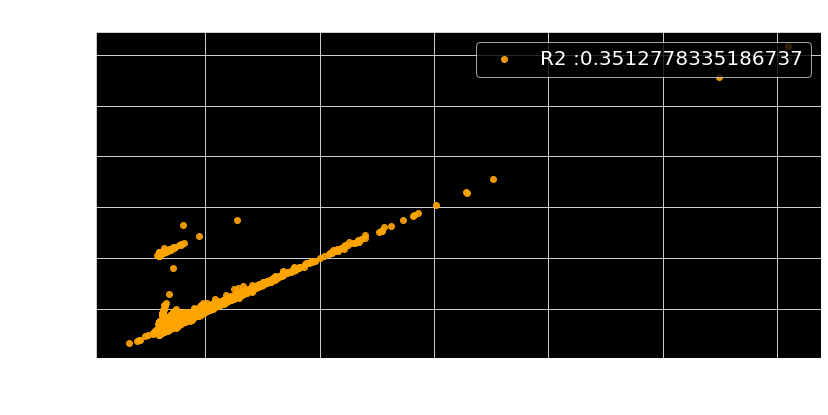

In [25]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 0 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right'
           )
plt.show()

In [26]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.396552,0.017415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017387
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,...,0.370690,0.017255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017210
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.387931,0.017286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017252
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,...,0.500000,0.017182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017167
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,...,0.448276,0.017267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,...,0.405172,0.017192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017205
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,...,0.301724,0.017375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017340
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,...,0.405172,0.017264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017222
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,...,0.362069,0.017681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017657


In [27]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         8.571888e+05
1         7.542244e+05
2         7.783801e+05
3         7.286302e+05
4         7.492918e+05
              ...     
281661    7.509230e+05
281662    8.299167e+05
281663    7.610884e+05
281664    1.014822e+06
281665    8.959832e+05
Name: 31, Length: 281666, dtype: float64

In [28]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,8.571888e+05
1,12598#201902,7.542244e+05
2,23697#201902,7.783801e+05
3,23768#201902,7.286302e+05
4,7174#201902,7.492918e+05
...,...,...
281661,8596193#202011,7.509230e+05
281662,8616083#202011,8.299167e+05
281663,8670207#202011,7.610884e+05
281664,8677655#202011,1.014822e+06


In [29]:
n = 80
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN80.csv'

In [30]:
np.mean(sub['gasto_familiar'])

769513.7296493533

In [31]:
sub.to_csv(sub_name, index=False)

# Test 1

In [32]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

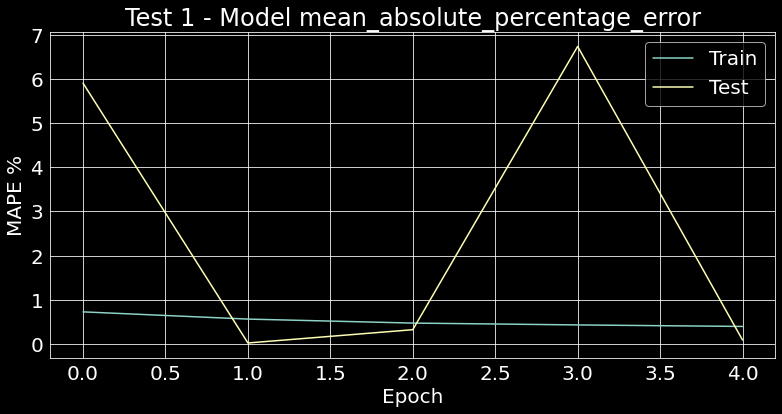

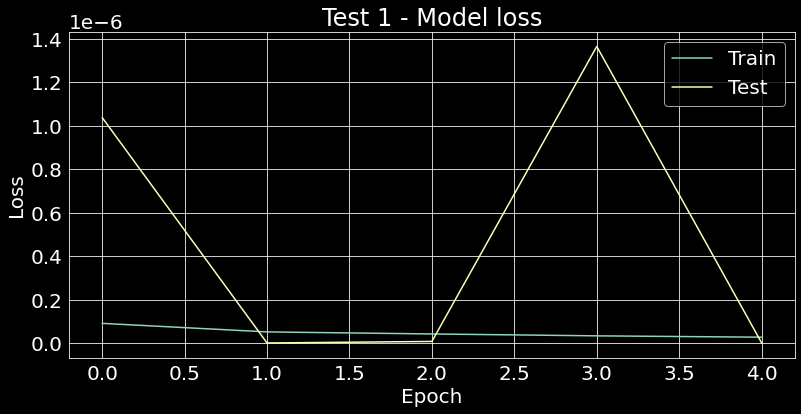

In [33]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 1 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 1 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [34]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 748us/step - loss: 1.0252e-09 - mean_absolute_percentage_error: 0.1733
loss :  1.0251632875935002e-09
mean_absolute_percentage_error :  0.17326608300209045


# Submission

In [35]:
y_hat = model.predict(x_val)
y_hat

array([[0.01742887],
       [0.01726822],
       [0.01729469],
       ...,
       [0.01725671],
       [0.01770625],
       [0.01749308]], dtype=float32)

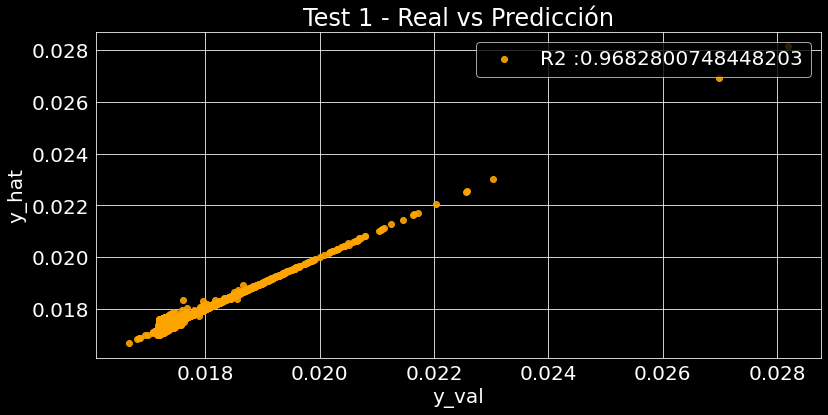

In [36]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 1 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [37]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.396552,0.017415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017429
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,...,0.370690,0.017255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017268
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.387931,0.017286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017295
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,...,0.500000,0.017182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017187
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,...,0.448276,0.017267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,...,0.405172,0.017192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017212
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,...,0.301724,0.017375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017390
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,...,0.405172,0.017264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017257
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,...,0.362069,0.017681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017706


In [38]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         8.818080e+05
1         7.879525e+05
2         8.034204e+05
3         7.404115e+05
4         8.029938e+05
              ...     
281661    7.549306e+05
281662    8.592562e+05
281663    7.812288e+05
281664    1.043845e+06
281665    9.193152e+05
Name: 31, Length: 281666, dtype: float64

In [39]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,8.818080e+05
1,12598#201902,7.879525e+05
2,23697#201902,8.034204e+05
3,23768#201902,7.404115e+05
4,7174#201902,8.029938e+05
...,...,...
281661,8596193#202011,7.549306e+05
281662,8616083#202011,8.592562e+05
281663,8670207#202011,7.812288e+05
281664,8677655#202011,1.043845e+06


In [40]:
n = 81
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN81.csv'

In [41]:
np.mean(sub['gasto_familiar'])

784902.4992254261

In [42]:
sub.to_csv(sub_name, index=False)

# Test 2

In [43]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


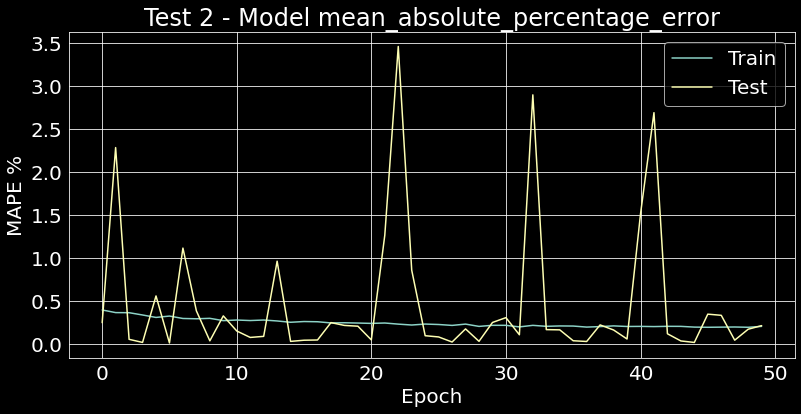

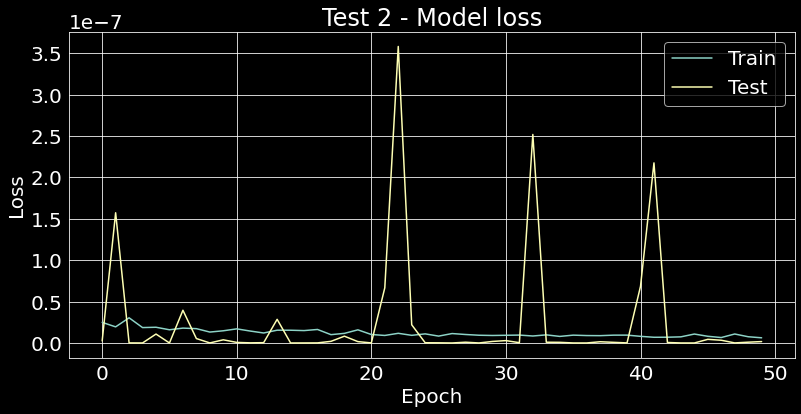

In [44]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [45]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 750us/step - loss: 4.8219e-09 - mean_absolute_percentage_error: 0.4154
loss :  4.8218682380252176e-09
mean_absolute_percentage_error :  0.4154461622238159


# Submission

In [46]:
y_hat = model.predict(x_val)
y_hat

array([[0.0174431 ],
       [0.01732933],
       [0.01731592],
       ...,
       [0.01731588],
       [0.01772459],
       [0.01751397]], dtype=float32)

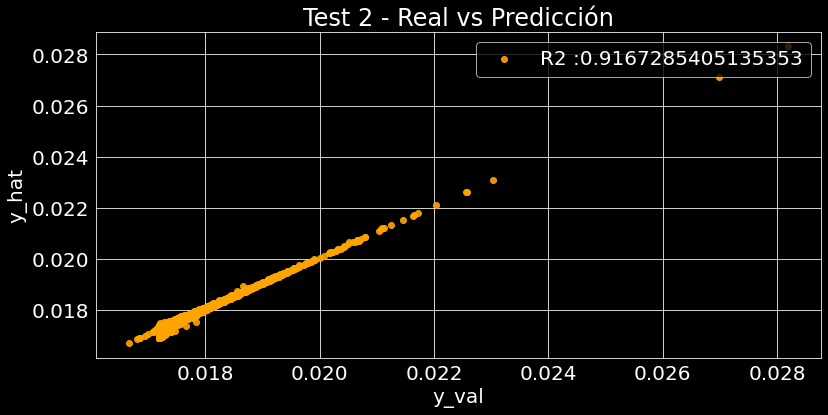

In [47]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 2 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [48]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.396552,0.017415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017443
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,...,0.370690,0.017255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017329
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.387931,0.017286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017316
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,...,0.500000,0.017182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017220
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,...,0.448276,0.017267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,...,0.405172,0.017192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017214
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,...,0.301724,0.017375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017415
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,...,0.405172,0.017264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017316
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,...,0.362069,0.017681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017725


In [49]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         8.901170e+05
1         8.236566e+05
2         8.158187e+05
3         7.598251e+05
4         8.123802e+05
              ...     
281661    7.563996e+05
281662    8.737089e+05
281663    8.157980e+05
281664    1.054564e+06
281665    9.315209e+05
Name: 31, Length: 281666, dtype: float64

In [50]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,8.901170e+05
1,12598#201902,8.236566e+05
2,23697#201902,8.158187e+05
3,23768#201902,7.598251e+05
4,7174#201902,8.123802e+05
...,...,...
281661,8596193#202011,7.563996e+05
281662,8616083#202011,8.737089e+05
281663,8670207#202011,8.157980e+05
281664,8677655#202011,1.054564e+06


In [51]:
n = 82
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN82.csv'

In [52]:
np.mean(sub['gasto_familiar'])

796849.1054493416

In [53]:
sub.to_csv(sub_name, index=False)

# Test 3

In [54]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


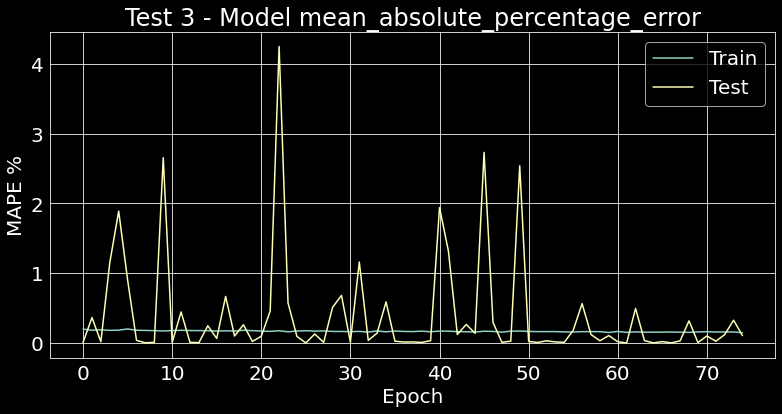

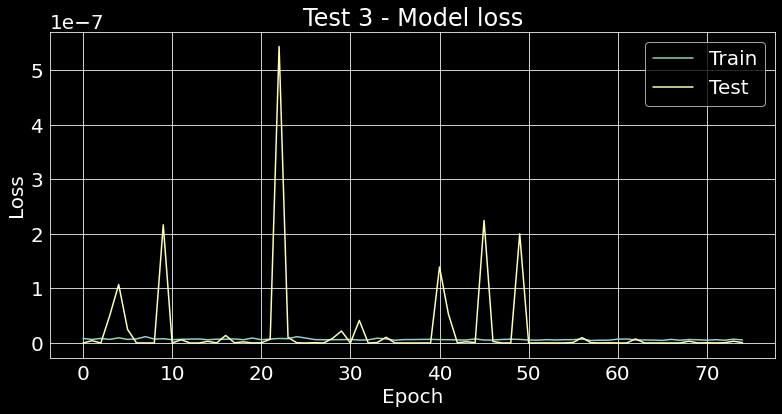

In [55]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [56]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

25740/25740 [==============================] - 19s 728us/step - loss: 5.5021e-10 - mean_absolute_percentage_error: 0.1103
loss :  5.502051036998523e-10
mean_absolute_percentage_error :  0.11027662456035614


## Submission

In [57]:
y_hat = model.predict(x_val)
y_hat

array([[0.01745003],
       [0.01726101],
       [0.01732084],
       ...,
       [0.01727655],
       [0.0176897 ],
       [0.01746668]], dtype=float32)

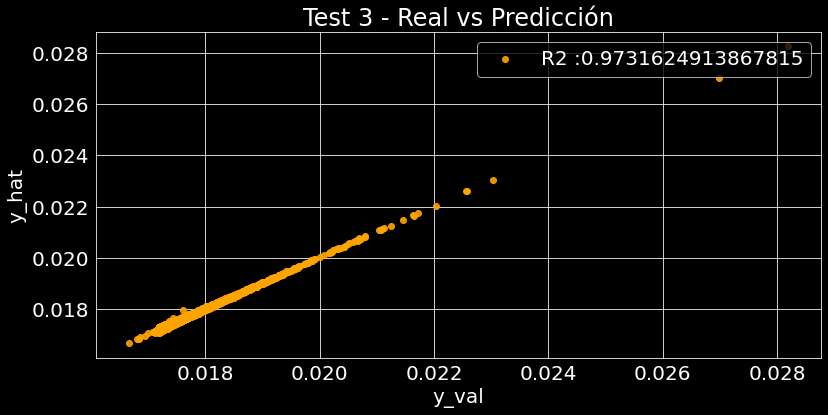

In [58]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 3 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [59]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.396552,0.017415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017450
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,...,0.370690,0.017255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017261
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.387931,0.017286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017321
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,...,0.500000,0.017182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017196
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,...,0.448276,0.017267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,...,0.405172,0.017192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017184
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,...,0.301724,0.017375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017386
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,...,0.405172,0.017264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017277
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,...,0.362069,0.017681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017690


In [60]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         8.941693e+05
1         7.837403e+05
2         8.186946e+05
3         7.456411e+05
4         7.769143e+05
              ...     
281661    7.388359e+05
281662    8.569167e+05
281663    7.928186e+05
281664    1.034177e+06
281665    9.038951e+05
Name: 31, Length: 281666, dtype: float64

In [61]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,8.941693e+05
1,12598#201902,7.837403e+05
2,23697#201902,8.186946e+05
3,23768#201902,7.456411e+05
4,7174#201902,7.769143e+05
...,...,...
281661,8596193#202011,7.388359e+05
281662,8616083#202011,8.569167e+05
281663,8670207#202011,7.928186e+05
281664,8677655#202011,1.034177e+06


In [62]:
n = 83
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN83.csv'

In [63]:
np.mean(sub['gasto_familiar'])

780724.6154857598

In [64]:
sub.to_csv(sub_name, index=False)

# Test 4

In [65]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


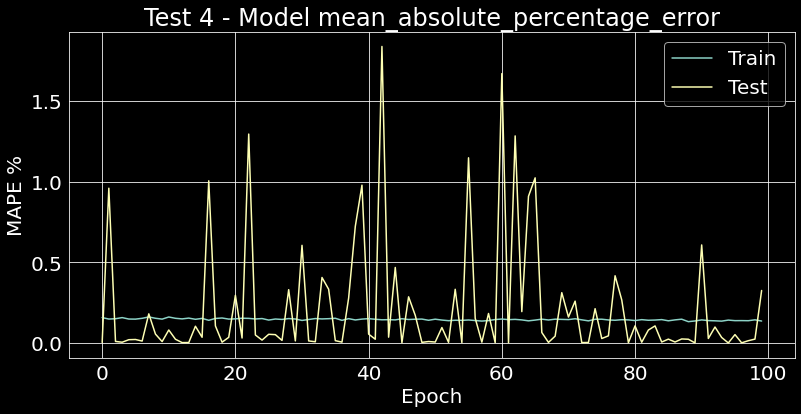

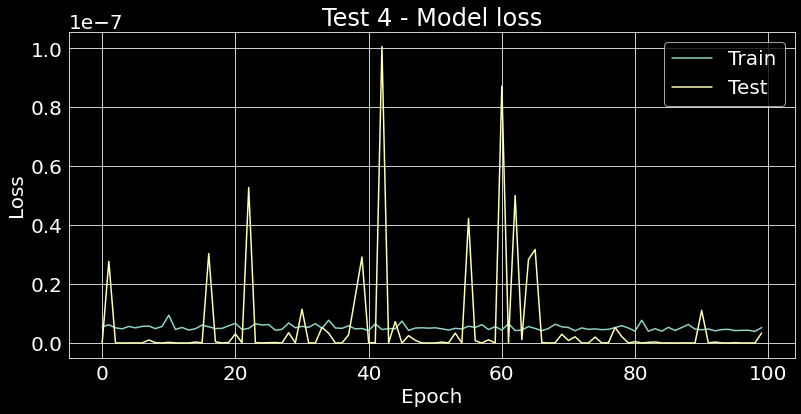

In [66]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [67]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

25740/25740 [==============================] - 19s 732us/step - loss: 9.3994e-09 - mean_absolute_percentage_error: 0.5805
loss :  9.399383493757796e-09
mean_absolute_percentage_error :  0.5804508924484253


## Submission

In [68]:
y_hat = model.predict(x_val)
y_hat

array([[0.01746165],
       [0.01728834],
       [0.01733071],
       ...,
       [0.01731359],
       [0.01776327],
       [0.01755306]], dtype=float32)

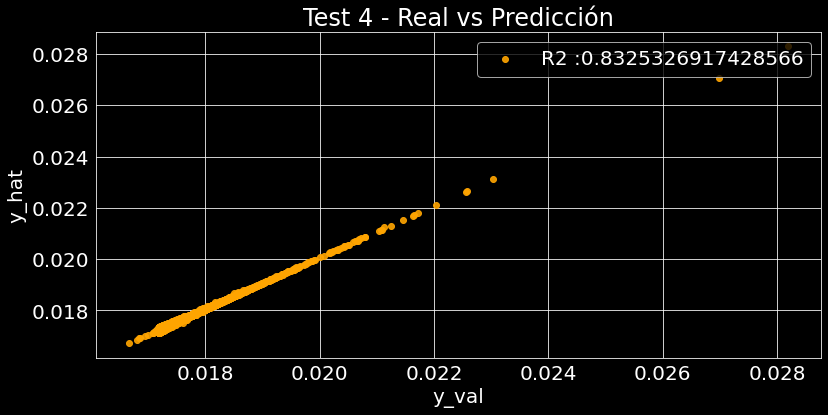

In [69]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 4 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [70]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.396552,0.017415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017462
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,...,0.370690,0.017255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017288
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.387931,0.017286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017331
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,...,0.500000,0.017182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017220
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,...,0.448276,0.017267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,...,0.405172,0.017192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017266
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,...,0.301724,0.017375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017422
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,...,0.405172,0.017264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017314
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,...,0.362069,0.017681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017763


In [71]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         9.009560e+05
1         7.997098e+05
2         8.244629e+05
3         7.596259e+05
4         8.250733e+05
              ...     
281661    7.864062e+05
281662    8.776643e+05
281663    8.144596e+05
281664    1.077157e+06
281665    9.543566e+05
Name: 31, Length: 281666, dtype: float64

In [72]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,9.009560e+05
1,12598#201902,7.997098e+05
2,23697#201902,8.244629e+05
3,23768#201902,7.596259e+05
4,7174#201902,8.250733e+05
...,...,...
281661,8596193#202011,7.864062e+05
281662,8616083#202011,8.776643e+05
281663,8670207#202011,8.144596e+05
281664,8677655#202011,1.077157e+06


In [73]:
n = 84
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN84.csv'

In [74]:
np.mean(sub['gasto_familiar'])

809201.5358647167

In [75]:
sub.to_csv(sub_name, index=False)

# Test 5

In [76]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



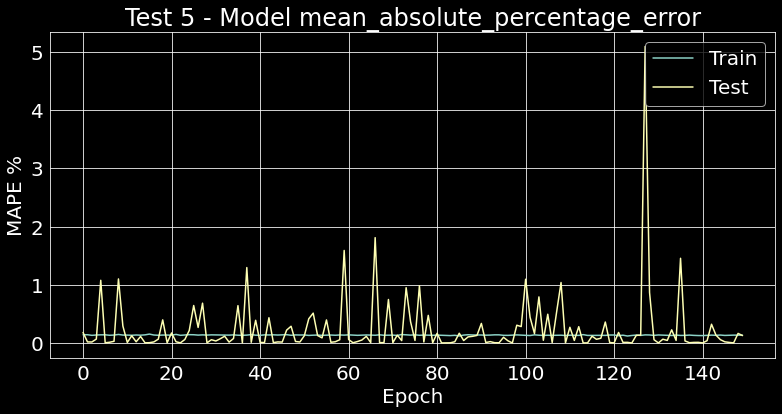

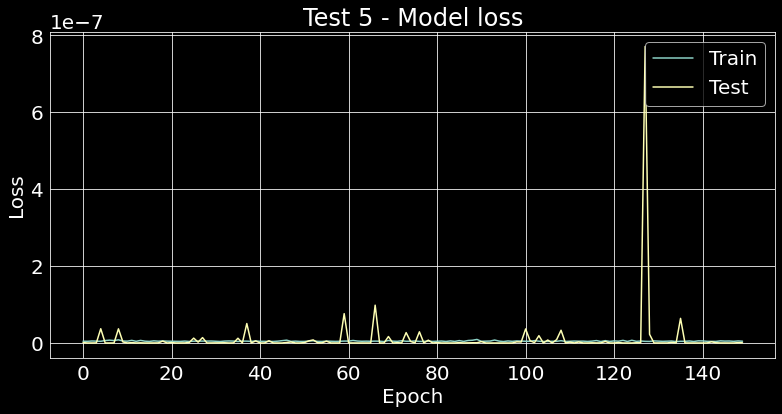

In [77]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [78]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

25740/25740 [==============================] - 18s 711us/step - loss: 3.9717e-10 - mean_absolute_percentage_error: 0.1365
loss :  3.9717149014073527e-10
mean_absolute_percentage_error :  0.13648918271064758


# Submission

In [79]:
y_hat = model.predict(x_val)
y_hat

array([[0.01743619],
       [0.01728004],
       [0.01730707],
       ...,
       [0.01728761],
       [0.01770478],
       [0.01750111]], dtype=float32)

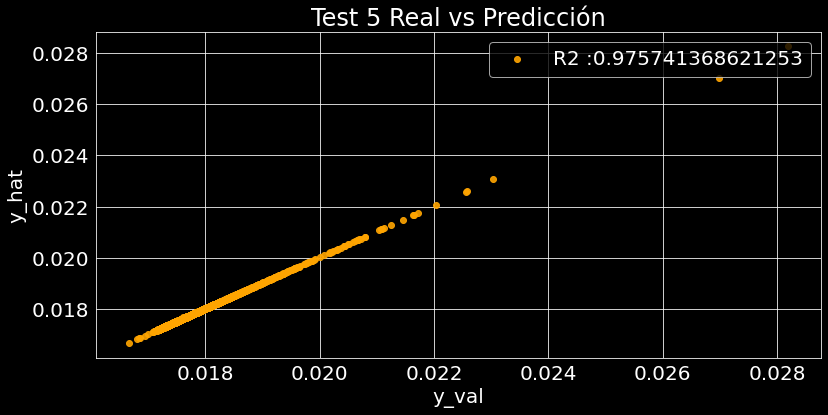

In [80]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 5 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [81]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[31] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.396552,0.017415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017436
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,...,0.370690,0.017255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017280
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,...,0.387931,0.017286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017307
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,...,0.500000,0.017182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017201
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,...,0.448276,0.017267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,...,0.405172,0.017192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017215
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,...,0.301724,0.017375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017398
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,...,0.405172,0.017264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017288
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,...,0.362069,0.017681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017705


In [82]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         8.860833e+05
1         7.948578e+05
2         8.106478e+05
3         7.485976e+05
4         8.007577e+05
              ...     
281661    7.566161e+05
281662    8.640016e+05
281663    7.992800e+05
281664    1.042987e+06
281665    9.240051e+05
Name: 31, Length: 281666, dtype: float64

In [83]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,8.860833e+05
1,12598#201902,7.948578e+05
2,23697#201902,8.106478e+05
3,23768#201902,7.485976e+05
4,7174#201902,8.007577e+05
...,...,...
281661,8596193#202011,7.566161e+05
281662,8616083#202011,8.640016e+05
281663,8670207#202011,7.992800e+05
281664,8677655#202011,1.042987e+06


In [84]:
n = 85
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN85.csv'

In [85]:
np.mean(sub['gasto_familiar'])

789263.3296694334

In [86]:
sub.to_csv(sub_name, index=False)